<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/integrals/Week_6_Integral_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *

# NUMERICAL INTEGRATION - Error Comparison
Dr. Daugherity, PHYS 451 - Spring 2021. 

Use the built-in trapz, simp, and romb integration methods to see how the error varies with number of data points.  
* trapz - can use on any data, but slow to converge
* simps - only defined for ODD number of data points, the scipy implementation will do a trapz approximation for an even number at a huge error cost.  Points do not have to be evenly spaced.
* romb - most accurate but the most restrictive.  Requires exactly $2^k+1$ evenly spaced data points for any positive integer $k$

## NOTES
1. numpy has trapz, everything else comes from scipy.integrate
2. **VERSION WARNING**: currently on colab I get scipy version 1.4.1 
  * 1.4.1:  trapz, simps, romb
  * 1.6.1:  trapezoid, simpson, romb  
3. ROMB has different syntax (requires even spacing, so doesn't accept xdata array)



## Links
* https://docs.scipy.org/doc/scipy/reference/integrate.html


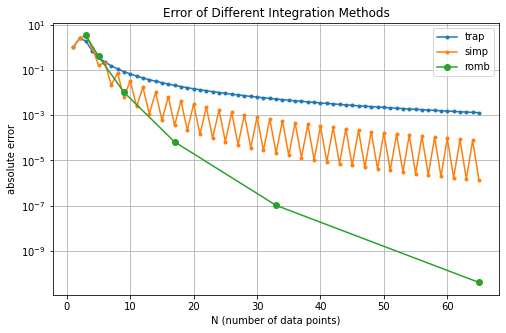

In [2]:
def f(x):  # function to integrate
  return np.cos(x)

KMAX = 6
NMAX = 2**KMAX+1 # number of data points
a = 0 # integration range
b = 8

# Initialize arrays
terr = np.zeros(NMAX) # errors 
serr = np.zeros(NMAX) # errors 
tn = np.zeros(NMAX)
actual = np.sin(b)   # analytic solution, could use quad to get a good numerical value instead

# Find the error for n data points

# Trapezoid and Simpsons Methods
for i in range(NMAX):
  n = i+1
  tn[i] = n
  xdata = np.linspace(a, b, n)
  ydata = f(xdata)  # data points to integrate
  trp = trapz(ydata, xdata)
  terr[i] = np.abs(trp - actual)
  smp = simps(ydata,xdata)
  serr[i] = np.abs(smp - actual)

# Romberg
KLIST = np.arange(1,KMAX+1)
NLIST = 2**KLIST + 1 # romb requires 2^k + 1 points
NUM = len(KLIST)
rerr = np.zeros(NUM)
for i in range(NUM):
  n = NLIST[i]
  xdata = np.linspace(a, b, n)
  dx=xdata[1]-xdata[0]
  ydata = f(xdata)  # data points to integrate
  rmb = romb(ydata,dx) 
  rerr[i] = np.abs(rmb - actual)

plt.figure(figsize=(8,5))
plt.semilogy(tn,terr,marker='.',label='trap')
plt.semilogy(tn,serr,marker='.',label='simp')
plt.semilogy(NLIST,rerr,marker='o',label='romb')
plt.xlabel('N (number of data points)')
plt.ylabel('absolute error')
plt.title('Error of Different Integration Methods')
plt.legend()
plt.grid()
plt.show()